In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Print shape of dataset
print(df.shape)

(7043, 21)


In [2]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


****Data Cleaning****

In [3]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')
features_with_na

[]

there is no missing values 

In [4]:
df.duplicated().sum()


0

In [5]:
df.drop('customerID', inplace=True, axis=1)


In [6]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

****Feature Engineering****


In [7]:
def transf(tenure):
    
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'


In [8]:
df['tenure']=df['tenure'].map(transf)
df['tenure'].value_counts()

tenure
0 - 24 months     3210
> 60 months       1407
24 - 36 months     832
48 - 60 months     832
36 - 48 months     762
Name: count, dtype: int64

In [9]:
# Step 1: Replace both empty strings and single spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace([' ', ''], np.nan)

# Step 2: Check how many missing
print("Missing TotalCharges:", df['TotalCharges'].isnull().sum())

# Step 3: Now convert safely to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Optional: drop rows with missing values
df.dropna(subset=['TotalCharges'], inplace=True)

# Final check
print("Remaining missing values:", df['TotalCharges'].isnull().sum())


Missing TotalCharges: 11
Remaining missing values: 0


Type of Features


numeric features

In [10]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


categorical features

In [11]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
cat_features

Num of Categorical Features : 17


['gender',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

discrete features

In [12]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 1


continuous features

In [13]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 2


Split X and Y


In [14]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [15]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

encoding target column

In [16]:
y= np.where(y=='Yes', 1,0)

In [17]:
y

array([0, 0, 1, ..., 0, 1, 0])

****Feature Transformation****


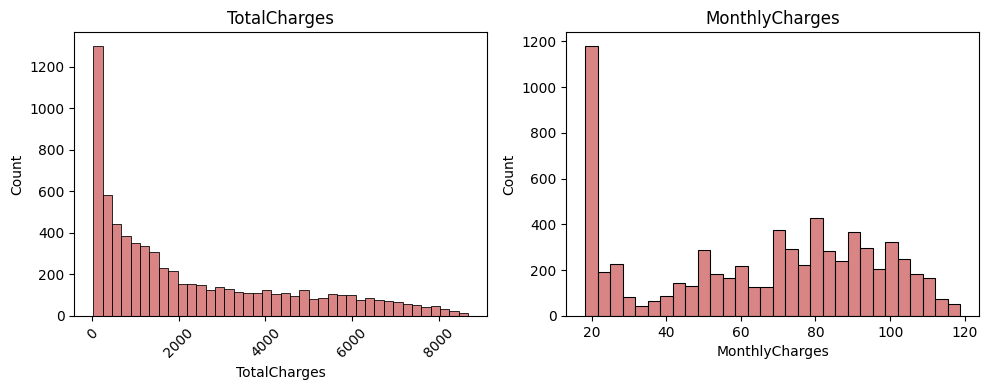

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(x=df['TotalCharges'], color='indianred', bins=40, ax=axes[0])
axes[0].set_title('TotalCharges')
axes[0].tick_params(axis='x', rotation=45)

sns.histplot(x=df['MonthlyCharges'], color='indianred', bins=30, ax=axes[1])
axes[1].set_title('MonthlyCharges')

plt.tight_layout()
plt.show()


****report:****

TotalCharges :The distribution is highly right-skewed (positively skewed).

MonthlyCharges: This is less skewed, but slightly left-skewed (negatively skewed) due to a peak at lower values (around 20) and a fairly even spread after that.

 we Apply a power transform featurewise to make data more Gaussian-like.

In [19]:
X[continuous_features].skew(axis=0, skipna=True)


MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

****Apply Power Transformer to Check if it can reduces the outliers****


In [20]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['MonthlyCharges', 'TotalCharges']
X_copy = pt.fit_transform(X[transform_features])

In [21]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)


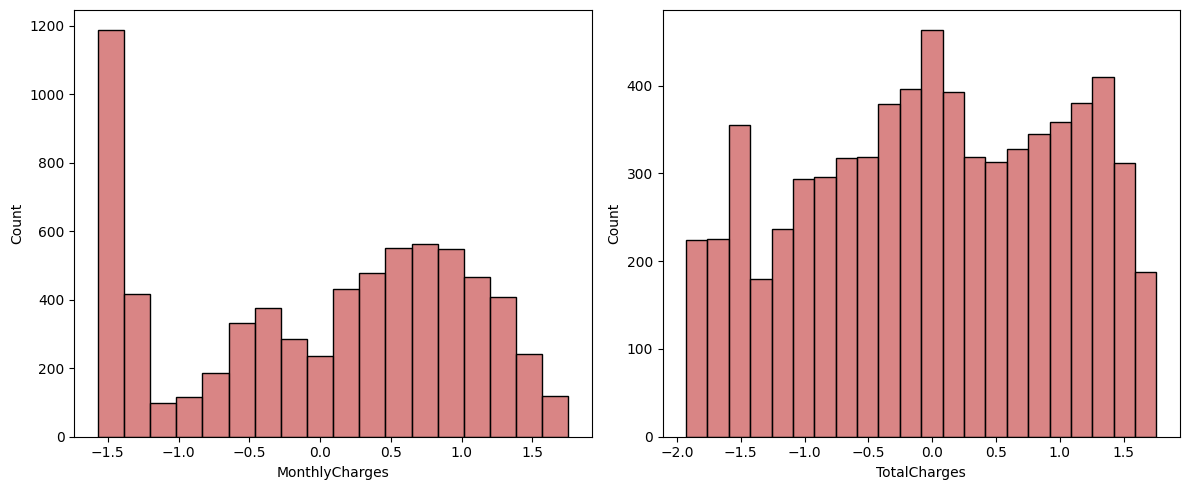

In [22]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

****Checking Skewness****



In [23]:
X_copy.skew(axis=0, skipna=True)


MonthlyCharges   -0.259485
TotalCharges     -0.144643
dtype: float64

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0 - 24 months,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,24 - 36 months,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,0 - 24 months,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,36 - 48 months,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,0 - 24 months,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


****Feature Encoding and Scaling****

In [25]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[cols] = df[cols].replace('No internet service', 'No')
df['MultipleLines']=df['MultipleLines'].replace('No phone service', 'No')


In [26]:
def display_category_distribution(df, cat_features):
    for col in cat_features:
        print(f"  {col.upper()} ({df[col].nunique()} unique values)")
        print("-" * 50)
        counts = df[col].value_counts()
        total = len(df[col])
        for val, count in counts.items():
            percent = 100 * count / total
            print(f"  • {val:<15} →  {count} records ({percent:.1f}%)")
        print()  # ligne vide pour séparer
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['customerID']]  # on exclut l’ID
display_category_distribution(df, cat_cols)

  GENDER (2 unique values)
--------------------------------------------------
  • Male            →  3549 records (50.5%)
  • Female          →  3483 records (49.5%)

  PARTNER (2 unique values)
--------------------------------------------------
  • No              →  3639 records (51.7%)
  • Yes             →  3393 records (48.3%)

  DEPENDENTS (2 unique values)
--------------------------------------------------
  • No              →  4933 records (70.2%)
  • Yes             →  2099 records (29.8%)

  TENURE (5 unique values)
--------------------------------------------------
  • 0 - 24 months   →  3199 records (45.5%)
  • > 60 months     →  1407 records (20.0%)
  • 24 - 36 months  →  832 records (11.8%)
  • 48 - 60 months  →  832 records (11.8%)
  • 36 - 48 months  →  762 records (10.8%)

  PHONESERVICE (2 unique values)
--------------------------------------------------
  • Yes             →  6352 records (90.3%)
  • No              →  680 records (9.7%)

  MULTIPLELINES (2 unique v

Preprocessing using column Transformer


In [27]:
# Create Column Transformer with 3 types of transformers
or_columns = ['gender'	,'SeniorCitizen',	'Partner',	'Dependents','PhoneService','MultipleLines','OnlineSecurity'	,'OnlineBackup','DeviceProtection'	,'TechSupport'	,'StreamingTV',	'StreamingMovies','PaperlessBilling']
oh_columns = ['Contract','PaymentMethod','tenure','InternetService']
transform_columns= [ 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [29]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.44032709,
        -1.16169394, -0.99419409],
       [ 0.        ,  1.        ,  0.        , ..., -0.44032709,
        -0.26087792, -0.17373982],
       [ 1.        ,  0.        ,  0.        , ..., -0.44032709,
        -0.36392329, -0.95964911],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.44032709,
        -1.17000405, -0.85451414],
       [ 1.        ,  0.        ,  0.        , ...,  2.27103902,
         0.31916782, -0.87209546],
       [ 0.        ,  0.        ,  1.        , ..., -0.44032709,
         1.35793167,  2.01234407]])

****Classification:****

handling the problem of imbalanced data 

In [30]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

Train Test split

In [31]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5223, 33), (1306, 33))

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [33]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [34]:
models={   "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}


In [35]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [36]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9571
- F1 score: 0.9614
- Precision: 0.9549
- Recall: 0.9681
- Roc Auc Score: 0.9558


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9395
- F1 score: 0.9456
- Precision: 0.9385
- Recall: 0.9528
- Roc Auc Score: 0.9380


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9604
- F1 score: 0.9655
- Precision: 0.9602
- Recall: 0.9708
- Roc Auc Score: 0.9586
----------------------------------
Model performance for Test set
- Accuracy: 0.9479
- F1 score: 0.9532
- Precision: 0.9454
- Recall: 0.9612
- Roc Auc Score: 0.9464


Logistic Regression
Model performance for Training 

In [37]:
base_model_report


,Model Name,Accuracy
6,CatBoosting Classifier,0.965544
5,XGBClassifier,0.963247
0,Random Forest,0.957121
2,Gradient Boosting,0.947933
4,K-Neighbors Classifier,0.947933
1,Decision Tree,0.939510
7,Support Vector Classifier,0.938744
8,AdaBoost Classifier,0.936447
3,Logistic Regression,0.907351


we chose CatBoosting, XGBClassifier and Random Forest	 Classifier for the huperparametre tunning 

Define the parameter distribution for Random forest,CatBoosting, XGBClassifier



In [38]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

catboost_params = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5, 7]
}

xgboost_params = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0]
}


In [39]:
randomcv_models = [
    ('RandomForest', RandomForestClassifier(), rf_params),
    ('CatBoost', CatBoostClassifier(verbose=0), catboost_params),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params)
]


In [40]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    print(f"\n🔍 Training {name}...")
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,  
        cv=3,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"\n---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])



🔍 Training RandomForest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

🔍 Training CatBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

🔍 Training XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

---------------- Best Params for RandomForest -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}

---------------- Best Params for CatBoost -------------------
{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 10}

---------------- Best Params for XGBoost -------------------
{'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1}


In [41]:
model_param


{'RandomForest': {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'log2',
  'max_depth': 30},
 'CatBoost': {'learning_rate': 0.05,
  'l2_leaf_reg': 1,
  'iterations': 300,
  'depth': 10},
 'XGBoost': {'subsample': 1.0,
  'n_estimators': 100,
  'min_child_weight': 1,
  'max_depth': 7,
  'learning_rate': 0.1}}

Retraining the Model with best Parameters

In [42]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RandomForest']),
    "XGBoost Classifier": XGBClassifier(**model_param['XGBoost'], n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost Classifier": CatBoostClassifier(**model_param['CatBoost'], verbose=0)
}

tuned_report = evaluate_models(X=X_res, y=y_res, models=best_models)

for name, score in tuned_report.items():
    print(f"{name}: {score}")


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9609
- F1 score: 0.9649
- Precision: 0.9564
- Recall: 0.9736
- Roc Auc Score: 0.9595


XGBoost Classifier
Model performance for Training set
- Accuracy: 0.9981
- F1 score: 0.9983
- Precision: 0.9977
- Recall: 0.9990
- Roc Auc Score: 0.9979
----------------------------------
Model performance for Test set
- Accuracy: 0.9602
- F1 score: 0.9642
- Precision: 0.9576
- Recall: 0.9709
- Roc Auc Score: 0.9589


CatBoost Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9678
- F1 score: 0.9710
- Precision: 0.9657
- Recall: 0.9764
- Roc Auc Score: 0.9668


Model Name: 2         CatBoost Cl

In [43]:
tuned_report


,Model Name,Accuracy
2,CatBoost Classifier,0.967841
0,Random Forest Classifier,0.960949
1,XGBoost Classifier,0.960184


In [44]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train with best parameters from hyperparameter tuning
best_model = CatBoostClassifier(**model_param['CatBoost'], verbose=0)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("📌 FINAL MODEL: 'CatBoost'")
print("✅ Accuracy Score: {:.4f}".format(score))
print("📊 Classification Report:\n", cr)



📌 FINAL MODEL: 'CatBoost'
✅ Accuracy Score: 0.9678
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       585
           1       0.97      0.98      0.97       721

    accuracy                           0.97      1306
   macro avg       0.97      0.97      0.97      1306
weighted avg       0.97      0.97      0.97      1306



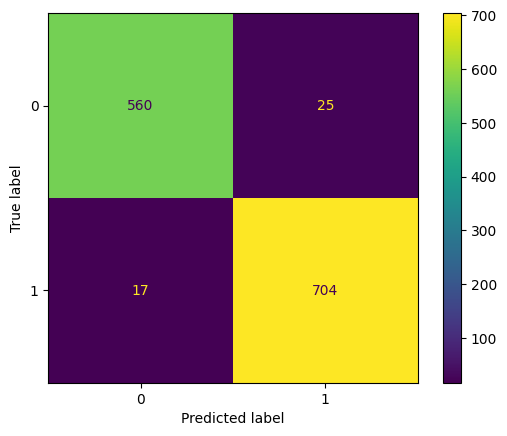

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

The best Model is Catboost with an  accuracy 96.78% 